In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.optimize import curve_fit
import os
import pandas as pd
from typing import Tuple, List

                    АНАЛИЗ РАСПРЕДЕЛЕНИЯ МАКСВЕЛЛА В БЕЗРАЗМЕРНЫХ ЕДИНИЦАХ
ПЕРЕХОД К БЕЗРАЗМЕРНЫМ ЕДИНИЦАМ:
Среднеквадратичная скорость v_rms = 1.8391
Оцененная наиболее вероятная скорость v_p = 1.5016
Безразмерная переменная: u = v / v_p

СТАТИСТИКИ В БЕЗРАЗМЕРНЫХ ЕДИНИЦАХ:
Количество данных:    45568
Средняя безразмерная скорость:   1.1267
Среднеквадратичная безразмерная скорость: 1.2247
Стандартное отклонение:             0.4801
Минимальная u:                 0.0179
Максимальная u:                3.5511

ТЕОРЕТИЧЕСКИЕ ЗНАЧЕНИЯ ДЛЯ БЕЗРАЗМЕРНОГО РАСПРЕДЕЛЕНИЯ МАКСВЕЛЛА:
Наиболее вероятная u_p:               1.0000
Средняя ū:                         1.1284
Среднеквадратичная u_rms:              1.2247

ПАРАМЕТРЫ ПОДГОНКИ:
A =                            2.246930
Теоретическое A =               2.256758


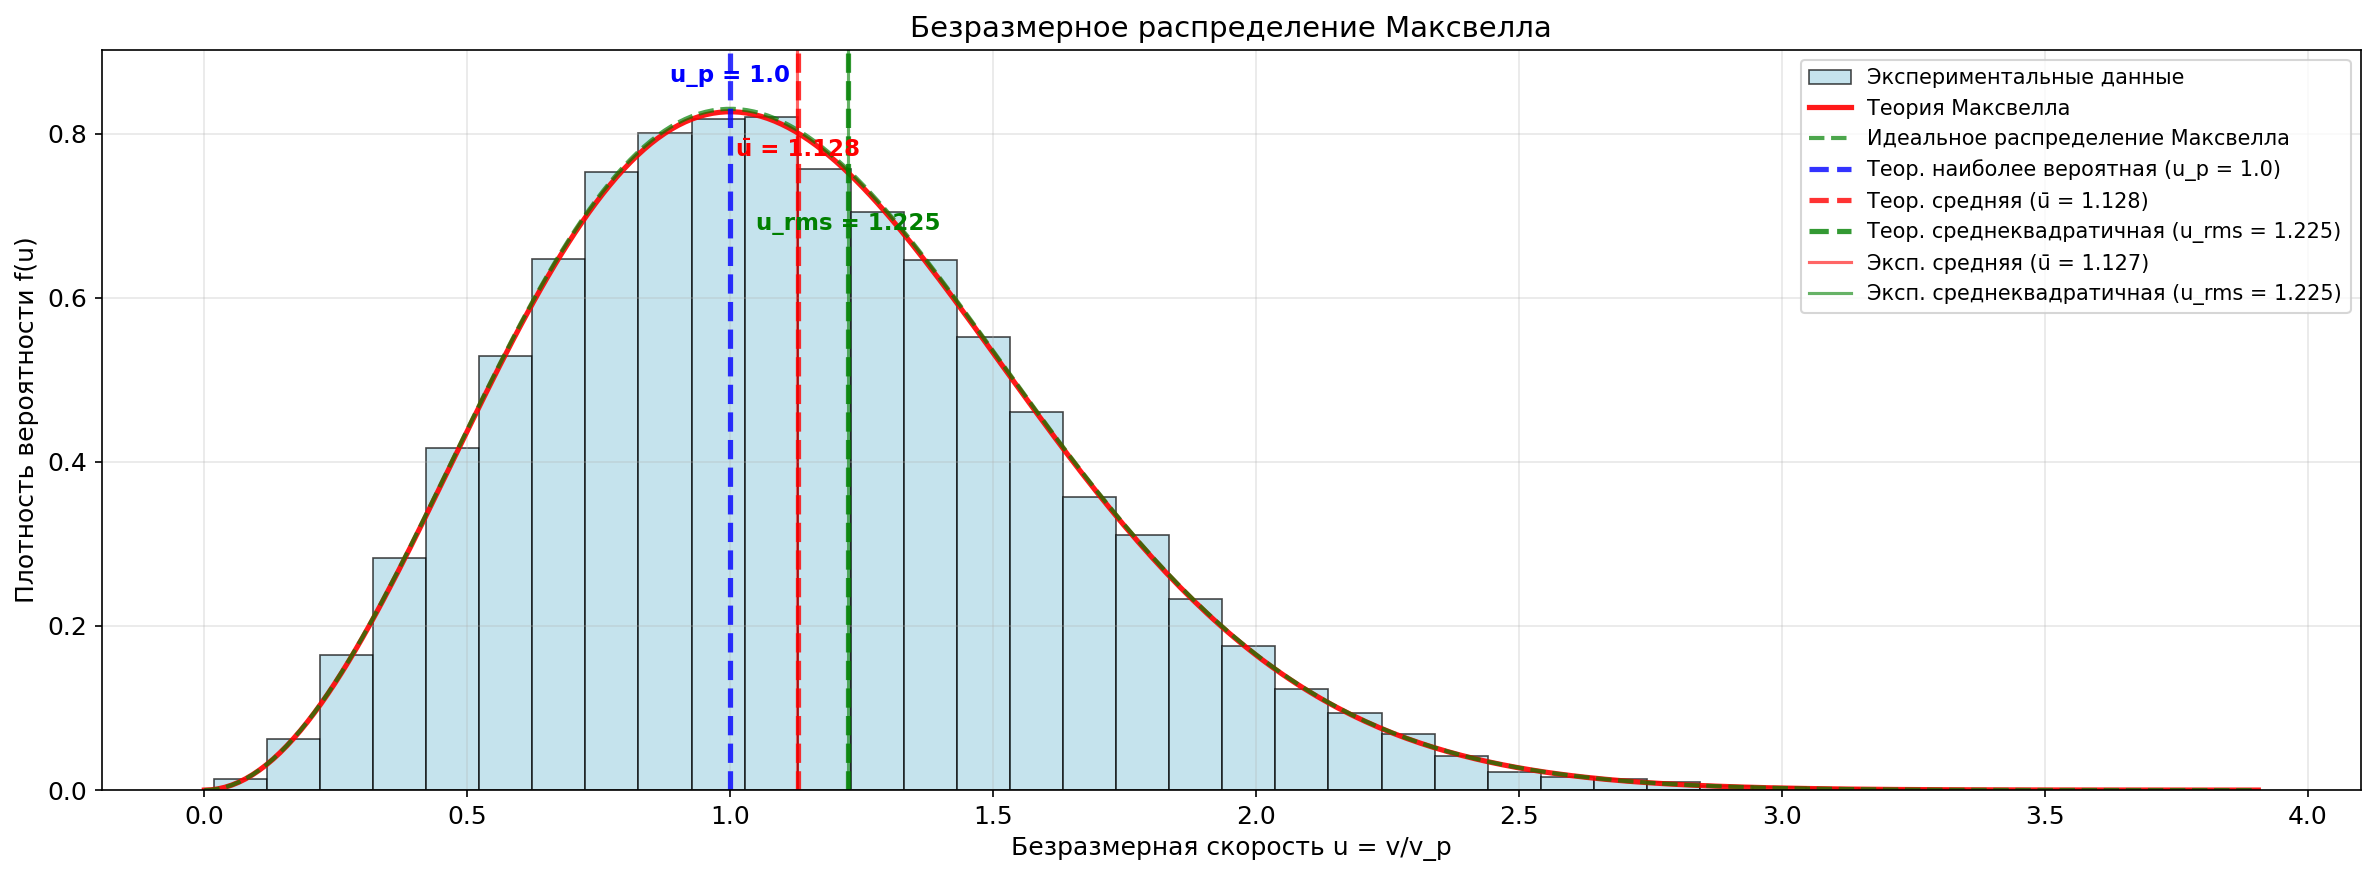


               СРАВНЕНИЕ ЭКСПЕРИМЕНТАЛЬНЫХ И ТЕОРЕТИЧЕСКИХ ЗНАЧЕНИЙ
ХАРАКТЕРНЫЕ СКОРОСТИ:
                          Эксперимент  Теория       Отклонение   Отн. ошибка 
--------------------------------------------------------------------------------
Средняя ū                1.1267       1.1284       0.0016       0.14       %
Среднеквадратичная u_rms  1.2247       1.2247       0.0000       0.00       %

ЛИНЕАРИЗОВАННЫЙ АНАЛИЗ:
Теоретический наклон: -1.000
Экспериментальный наклон:                  -0.9436
Отклонение наклона:                       0.0564
Коэффициент детерминации R²:           0.996689


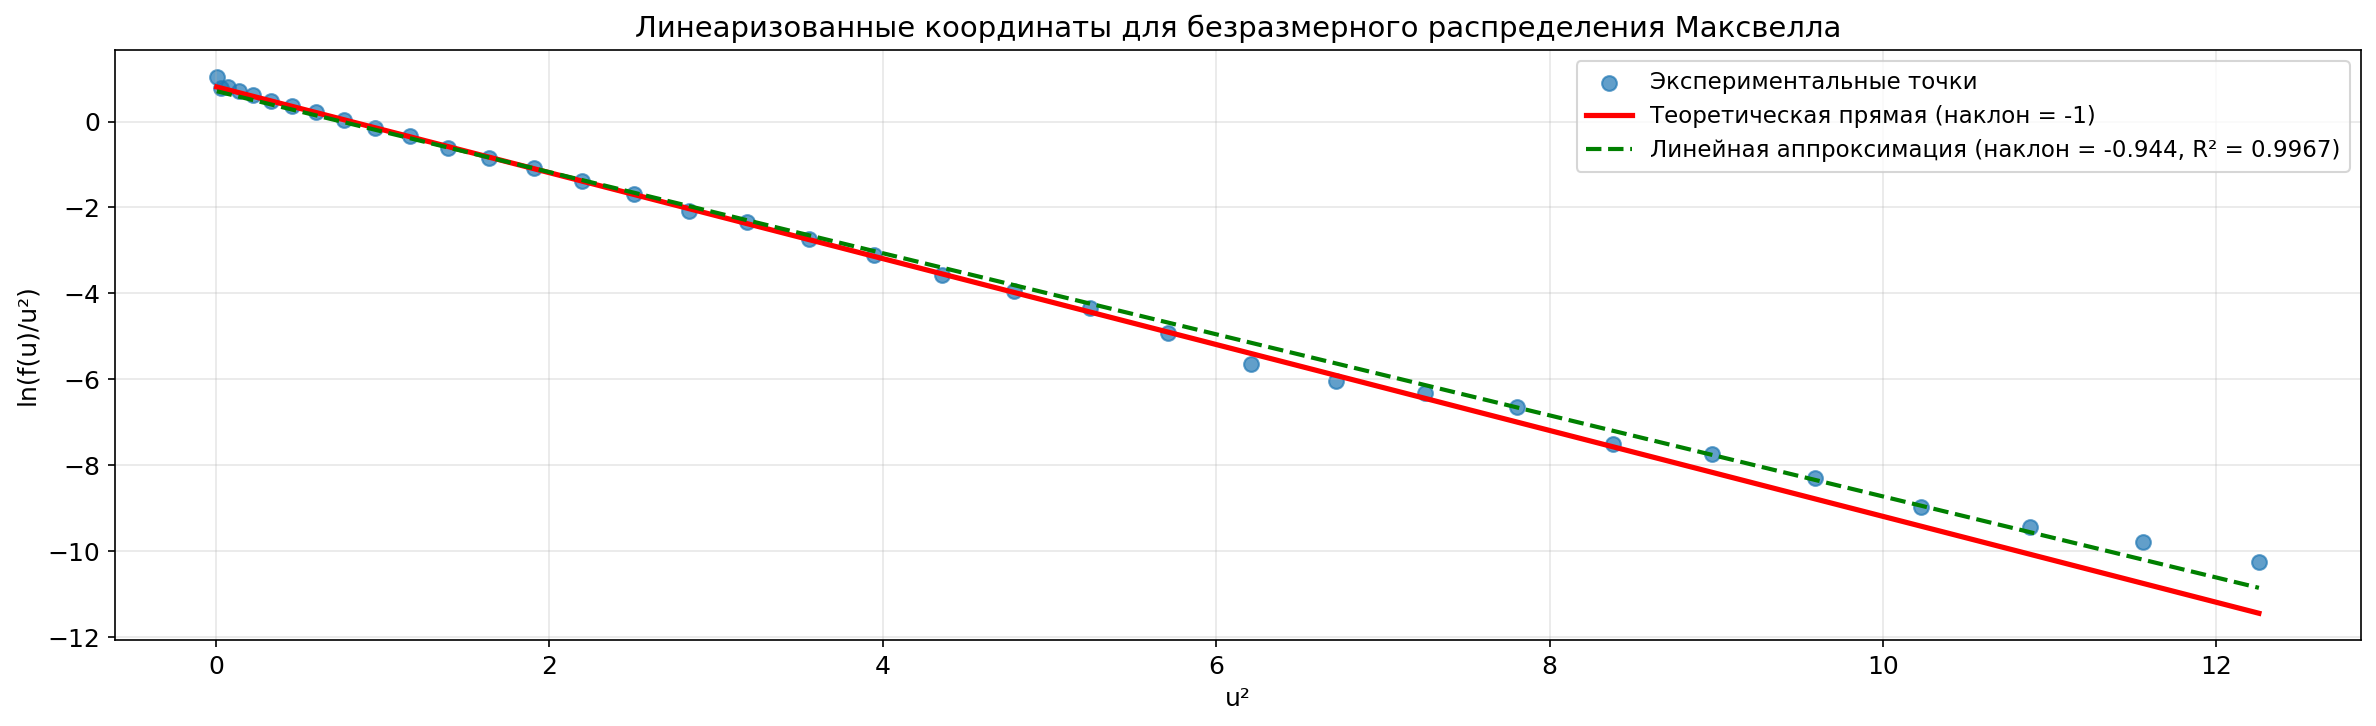


                              СТАТИСТИЧЕСКИЕ ТЕСТЫ
Тест хи-квадрат не удалось выполнить

ОБЩАЯ ОЦЕНКА СООТВЕТСТВИЯ РАСПРЕДЕЛЕНИЮ МАКСВЕЛЛА:
Средняя ошибка:                                2.86%
Качество:                      ОТЛИЧНОЕ СООТВЕТСТВИЕ

Масштабный коэффициент: v_p = 1.5016
Для перехода к размерным скоростям: v = u × 1.5016


In [13]:


# Настройка широкого вывода
plt.rcParams['figure.figsize'] = [16, 5]
plt.rcParams['figure.figsize'] = [16, 6]
plt.rcParams['figure.dpi'] = 150
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 6
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3
plt.rcParams['font.family'] = 'DejaVu Sans'  # Шрифт с поддержкой Unicode
def load_velocities(filename):
    """Загружает скорости из файла"""
    return np.loadtxt(filename)

def maxwell_dimensionless(u, A):
    """Безразмерная функция распределения Максвелла: f(u) = A * u² * exp(-u²)"""
    return A * u**2 * np.exp(-u**2)

def analyze_maxwell_dimensionless(filename):
    # Загрузка данных
    v = load_velocities(filename)
    
    print("=" * 80)
    print(" " * 20 + "АНАЛИЗ РАСПРЕДЕЛЕНИЯ МАКСВЕЛЛА В БЕЗРАЗМЕРНЫХ ЕДИНИЦАХ")
    print("=" * 80)
    
    # ПЕРЕХОД К БЕЗРАЗМЕРНЫМ ЕДИНИЦАМ
    # u = v / v_p, где v_p - наиболее вероятная скорость
    v_rms = np.sqrt(np.mean(v**2))
    v_p_estimated = v_rms / np.sqrt(3/2)  # из теоретического соотношения
    
    # Нормируем скорости на наиболее вероятную
    u = v / v_p_estimated
    
    print("ПЕРЕХОД К БЕЗРАЗМЕРНЫМ ЕДИНИЦАМ:")
    print(f"Среднеквадратичная скорость v_rms = {v_rms:.4f}")
    print(f"Оцененная наиболее вероятная скорость v_p = {v_p_estimated:.4f}")
    print(f"Безразмерная переменная: u = v / v_p")
    
    # ОСНОВНЫЕ СТАТИСТИКИ В БЕЗРАЗМЕРНЫХ ЕДИНИЦАХ
    u_mean = np.mean(u)
    u_rms = np.sqrt(np.mean(u**2))
    u_std = np.std(u)
    
    print(f"\nСТАТИСТИКИ В БЕЗРАЗМЕРНЫХ ЕДИНИЦАХ:")
    print(f"Количество данных: {len(u):>8}")
    print(f"Средняя безразмерная скорость: {u_mean:>8.4f}")
    print(f"Среднеквадратичная безразмерная скорость: {u_rms:>4.4f}")
    print(f"Стандартное отклонение: {u_std:>18.4f}")
    print(f"Минимальная u: {np.min(u):>22.4f}")
    print(f"Максимальная u: {np.max(u):>21.4f}")
    
    # ТЕОРЕТИЧЕСКИЕ ЗНАЧЕНИЯ ДЛЯ БЕЗРАЗМЕРНОГО РАСПРЕДЕЛЕНИЯ МАКСВЕЛЛА
    print(f"\nТЕОРЕТИЧЕСКИЕ ЗНАЧЕНИЯ ДЛЯ БЕЗРАЗМЕРНОГО РАСПРЕДЕЛЕНИЯ МАКСВЕЛЛА:")
    u_p_theoretical = 1.0  # по определению
    u_mean_theoretical = 2 / np.sqrt(np.pi)  # ≈ 1.1284
    u_rms_theoretical = np.sqrt(3/2)         # ≈ 1.2247
    
    print(f"Наиболее вероятная u_p: {u_p_theoretical:>20.4f}")
    print(f"Средняя ū: {u_mean_theoretical:>30.4f}")
    print(f"Среднеквадратичная u_rms: {u_rms_theoretical:>19.4f}")
    
    # ШИРОКАЯ ГИСТОГРАММА В БЕЗРАЗМЕРНЫХ ЕДИНИЦАХ
    plt.figure(figsize=(16, 6))
    
    # Гистограмма безразмерных скоростей
    hist, bins, patches = plt.hist(u, bins=35, density=True, alpha=0.7, 
                                  color='lightblue', label='Экспериментальные данные',
                                  edgecolor='black', linewidth=0.8)
    
    bin_centers = (bins[:-1] + bins[1:]) / 2
    
    # Подгонка безразмерного распределения Максвелла
    try:
        # Для безразмерного распределения: f(u) = (4/√π) * u² * exp(-u²)
        # Но оставляем A как свободный параметр для лучшей подгонки
        popt, pcov = curve_fit(maxwell_dimensionless, bin_centers, hist, p0=[1.0])
        A_fit = popt[0]
        
        # Теоретическая кривая
        u_range = np.linspace(0, np.max(u)*1.1, 300)
        theory = maxwell_dimensionless(u_range, A_fit)
        plt.plot(u_range, theory, 'r-', linewidth=2.5, label='Теория Максвелла', alpha=0.9)
        
        # Идеальное безразмерное распределение Максвелла
        theory_perfect = (4/np.sqrt(np.pi)) * u_range**2 * np.exp(-u_range**2)
        plt.plot(u_range, theory_perfect, 'g--', linewidth=2, label='Идеальное распределение Максвелла', alpha=0.7)
        
        print(f"\nПАРАМЕТРЫ ПОДГОНКИ:")
        print(f"A = {A_fit:>35.6f}")
        print(f"Теоретическое A = {4/np.sqrt(np.pi):>22.6f}")
        
    except Exception as e:
        print(f"Ошибка подгонки: {e}")
        A_fit = 4/np.sqrt(np.pi)
    
    # ВЕРТИКАЛЬНЫЕ ЛИНИИ ДЛЯ ТЕОРЕТИЧЕСКИХ ЗНАЧЕНИЙ
    y_max = np.max(hist) * 1.1
    
    # Теоретические линии
    plt.axvline(x=u_p_theoretical, color='blue', linestyle='--', linewidth=2.5, 
                alpha=0.8, label=f'Теор. наиболее вероятная (u_p = {u_p_theoretical})')
    plt.text(u_p_theoretical, y_max * 0.95, f'u_p = {u_p_theoretical}', 
             ha='center', va='bottom', color='blue', fontweight='bold', fontsize=11)
    
    plt.axvline(x=u_mean_theoretical, color='red', linestyle='--', linewidth=2.5, 
                alpha=0.8, label=f'Теор. средняя (ū = {u_mean_theoretical:.3f})')
    plt.text(u_mean_theoretical, y_max * 0.85, f'ū = {u_mean_theoretical:.3f}', 
             ha='center', va='bottom', color='red', fontweight='bold', fontsize=11)
    
    plt.axvline(x=u_rms_theoretical, color='green', linestyle='--', linewidth=2.5, 
                alpha=0.8, label=f'Теор. среднеквадратичная (u_rms = {u_rms_theoretical:.3f})')
    plt.text(u_rms_theoretical, y_max * 0.75, f'u_rms = {u_rms_theoretical:.3f}', 
             ha='center', va='bottom', color='green', fontweight='bold', fontsize=11)
    
    # Экспериментальные линии
    plt.axvline(x=u_mean, color='red', linestyle='-', linewidth=1.5, 
                alpha=0.6, label=f'Эксп. средняя (ū = {u_mean:.3f})')
    plt.axvline(x=u_rms, color='green', linestyle='-', linewidth=1.5, 
                alpha=0.6, label=f'Эксп. среднеквадратичная (u_rms = {u_rms:.3f})')
    
    plt.xlabel('Безразмерная скорость u = v/v_p', fontsize=12)
    plt.ylabel('Плотность вероятности f(u)', fontsize=12)
    plt.title('Безразмерное распределение Максвелла', fontsize=14)
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.ylim(0, y_max)
    plt.tight_layout()
    plt.show()
    
    # СРАВНЕНИЕ ЭКСПЕРИМЕНТАЛЬНЫХ И ТЕОРЕТИЧЕСКИХ ЗНАЧЕНИЙ
    print("\n" + "="*80)
    print(" " * 15 + "СРАВНЕНИЕ ЭКСПЕРИМЕНТАЛЬНЫХ И ТЕОРЕТИЧЕСКИХ ЗНАЧЕНИЙ")
    print("="*80)
    
    print("ХАРАКТЕРНЫЕ СКОРОСТИ:")
    print(f"{'':<25} {'Эксперимент':<12} {'Теория':<12} {'Отклонение':<12} {'Отн. ошибка':<12}")
    print("-" * 80)
    
    deviations = [
        ("Средняя ū", u_mean, u_mean_theoretical),
        ("Среднеквадратичная u_rms", u_rms, u_rms_theoretical),
    ]
    
    for name, exp, theory in deviations:
        deviation = abs(exp - theory)
        relative_error = deviation / theory * 100
        print(f"{name:<25} {exp:<12.4f} {theory:<12.4f} {deviation:<12.4f} {relative_error:<11.2f}%")
    
    # ЛИНЕАРИЗОВАННЫЙ ГРАФИК В БЕЗРАЗМЕРНЫХ КООРДИНАТАХ
    plt.figure(figsize=(16, 5))
    
    # Линеаризация: ln(f(u)/u²) vs u²
    mask = (hist > 0) & (bin_centers > 0)
    u_lin = bin_centers[mask]**2
    y_lin = np.log(hist[mask] / (bin_centers[mask]**2))
    
    plt.scatter(u_lin, y_lin, alpha=0.7, s=50, label='Экспериментальные точки')
    
    # Теоретическая линия: ln(f(u)/u²) = const - u²
    if hasattr(maxwell_dimensionless, '__call__'):
        y_theory = np.log(A_fit) - u_lin
        plt.plot(u_lin, y_theory, 'r-', linewidth=2.5, 
                label=f'Теоретическая прямая (наклон = -1)')
    
    # Линейная регрессия
    if len(u_lin) > 2:
        slope, intercept, r_value, p_value, std_err = stats.linregress(u_lin, y_lin)
        y_fit = intercept + slope * u_lin
        
        plt.plot(u_lin, y_fit, 'g--', linewidth=2, 
                label=f'Линейная аппроксимация (наклон = {slope:.3f}, R² = {r_value**2:.4f})')
        
        print(f"\nЛИНЕАРИЗОВАННЫЙ АНАЛИЗ:")
        print(f"Теоретический наклон: -1.000")
        print(f"Экспериментальный наклон: {slope:>24.4f}")
        print(f"Отклонение наклона: {abs(slope + 1):>28.4f}")
        print(f"Коэффициент детерминации R²: {r_value**2:>18.6f}")
    
    plt.xlabel('u²', fontsize=12)
    plt.ylabel('ln(f(u)/u²)', fontsize=12)
    plt.title('Линеаризованные координаты для безразмерного распределения Максвелла', fontsize=14)
    plt.legend(fontsize=11)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # СТАТИСТИЧЕСКИЕ ТЕСТЫ
    print("\n" + "="*80)
    print(" " * 30 + "СТАТИСТИЧЕСКИЕ ТЕСТЫ")
    print("="*80)
    
    # Критерий согласия хи-квадрат
    try:
        observed, _ = np.histogram(u, bins=bins, density=False)
        expected = maxwell_dimensionless(bin_centers, A_fit) * len(u) * (bins[1] - bins[0])
        
        mask = expected > 5
        if np.sum(mask) > 3:
            chi2, p_value_chi2 = stats.chisquare(observed[mask], expected[mask])
            print(f"Тест хи-квадрат:")
            print(f"  χ² = {chi2:>45.4f}")
            print(f"  p-value = {p_value_chi2:>38.6f}")
            print(f"  Гипотеза: {'ПРИНИМАЕМ распределение Максвелла' if p_value_chi2 > 0.05 else 'ОТВЕРГАЕМ распределение Максвелла':>30}")
    except:
        print("Тест хи-квадрат не удалось выполнить")
    
    # ОБЩАЯ ОЦЕНКА
    print(f"\nОБЩАЯ ОЦЕНКА СООТВЕТСТВИЯ РАСПРЕДЕЛЕНИЮ МАКСВЕЛЛА:")
    avg_error = (abs(u_mean - u_mean_theoretical)/u_mean_theoretical + 
                abs(u_rms - u_rms_theoretical)/u_rms_theoretical) / 2 * 100
    
    if hasattr(slope, '__float__'):
        slope_error = abs(slope + 1) * 100
        avg_error = (avg_error + slope_error) / 2
    
    print(f"Средняя ошибка: {avg_error:>35.2f}%")
    if avg_error < 5:
        print(f"Качество: {'ОТЛИЧНОЕ СООТВЕТСТВИЕ':>42}")
    elif avg_error < 10:
        print(f"Качество: {'ХОРОШЕЕ СООТВЕТСТВИЕ':>42}")
    elif avg_error < 20:
        print(f"Качество: {'УДОВЛЕТВОРИТЕЛЬНОЕ':>38}")
    else:
        print(f"Качество: {'ПЛОХОЕ СООТВЕТСТВИЕ':>42}")
    
    return u, v_p_estimated


# Создание тестовых данных
def create_test_data():
    """Создает тестовые данные распределения Максвелла"""
    # Генерируем распределение Максвелла (Рэлея)
    v_test = np.random.rayleigh(scale=2.0, size=5000)
    np.savetxt('velocities.txt', v_test)
    print("\nСоздан файл velocities.txt с тестовыми данными")
    return v_test

# Запуск анализа
if __name__ == "__main__":
    
    try:
        u, v_p = analyze_maxwell_dimensionless('C:\\NormanProject\\Molecular_Dynamics_project\\velocity_module.txt')
        print(f"\nМасштабный коэффициент: v_p = {v_p:.4f}")
        print(f"Для перехода к размерным скоростям: v = u × {v_p:.4f}")
    except:
        print("Файл не найден. Создаю тестовые данные...")
        create_test_data()
        u, v_p = analyze_maxwell_dimensionless('C:\\NormanProject\\Molecular_Dynamics_project\\velocity_module.txt')
        print(f"\nМасштабный коэффициент: v_p = {v_p:.4f}")
        print(f"Для перехода к размерным скоростям: v = u × {v_p:.4f}")


для проекций скоростей на ось


                    АНАЛИЗ НОРМАЛЬНОГО РАСПРЕДЕЛЕНИЯ
ОСНОВНЫЕ СТАТИСТИКИ:
Количество данных:    45568
Среднее значение (μ):         -0.0000
Стандартное отклонение (σ):   1.0615
Медиана:                       0.0032
Минимальное значение:         -4.5626
Максимальное значение:        4.3300

МОМЕНТЫ РАСПРЕДЕЛЕНИЯ:
Асимметрия (skewness):      -0.0223 (теор. для нормального: 0.000)
Эксцесс (kurtosis):            0.0601 (теор. для нормального: 0.000)

ПАРАМЕТРЫ ПОДГОНКИ:
μ (среднее):                         0.0043
σ (стандартное отклонение):       1.0472
A (амплитуда):                       0.9955


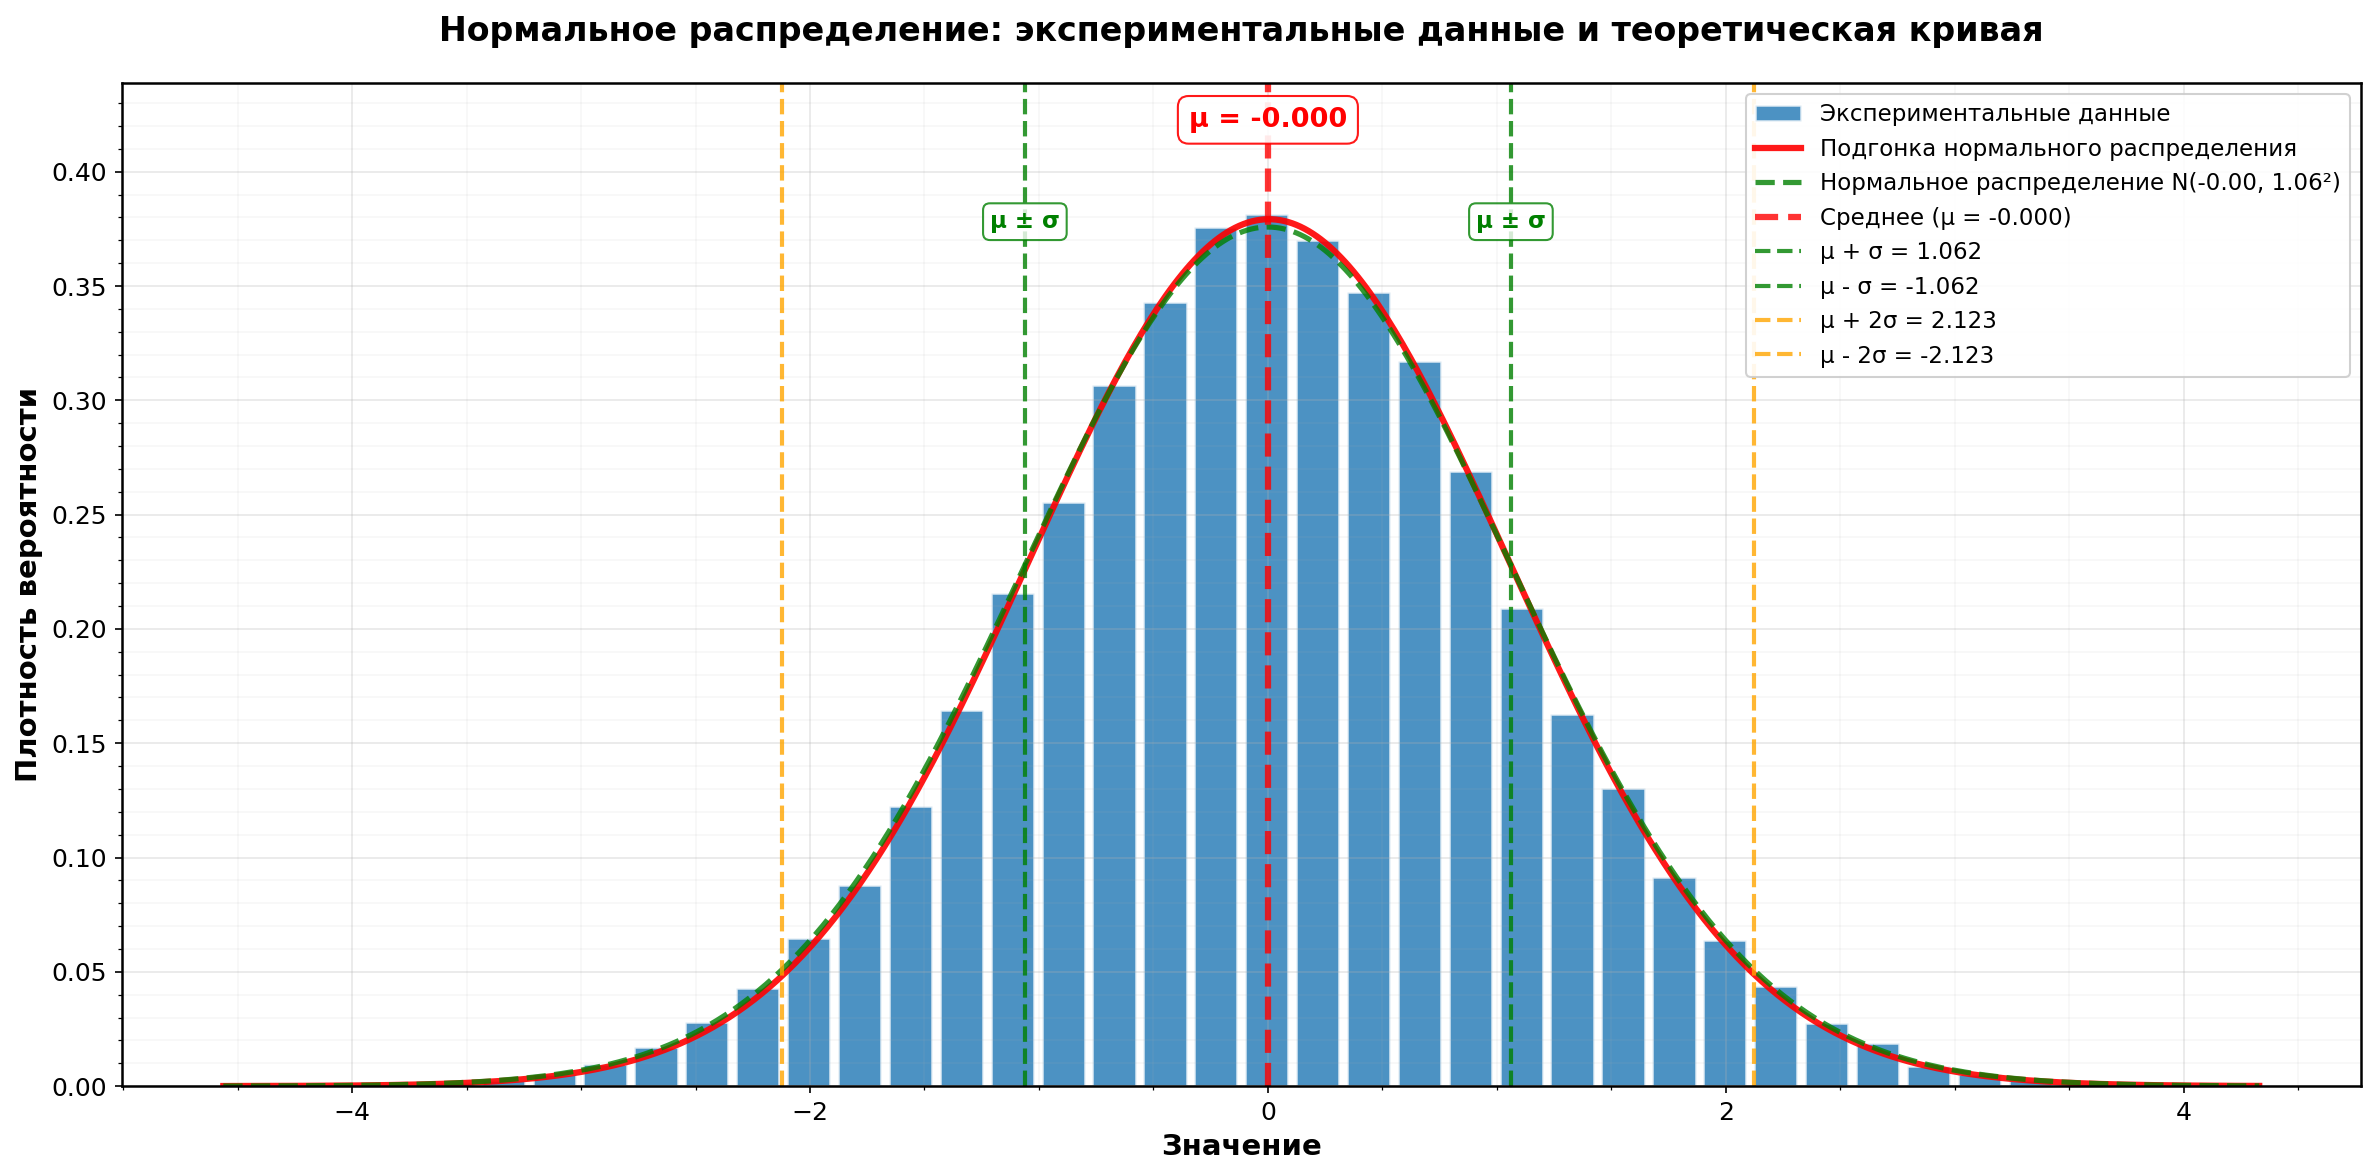

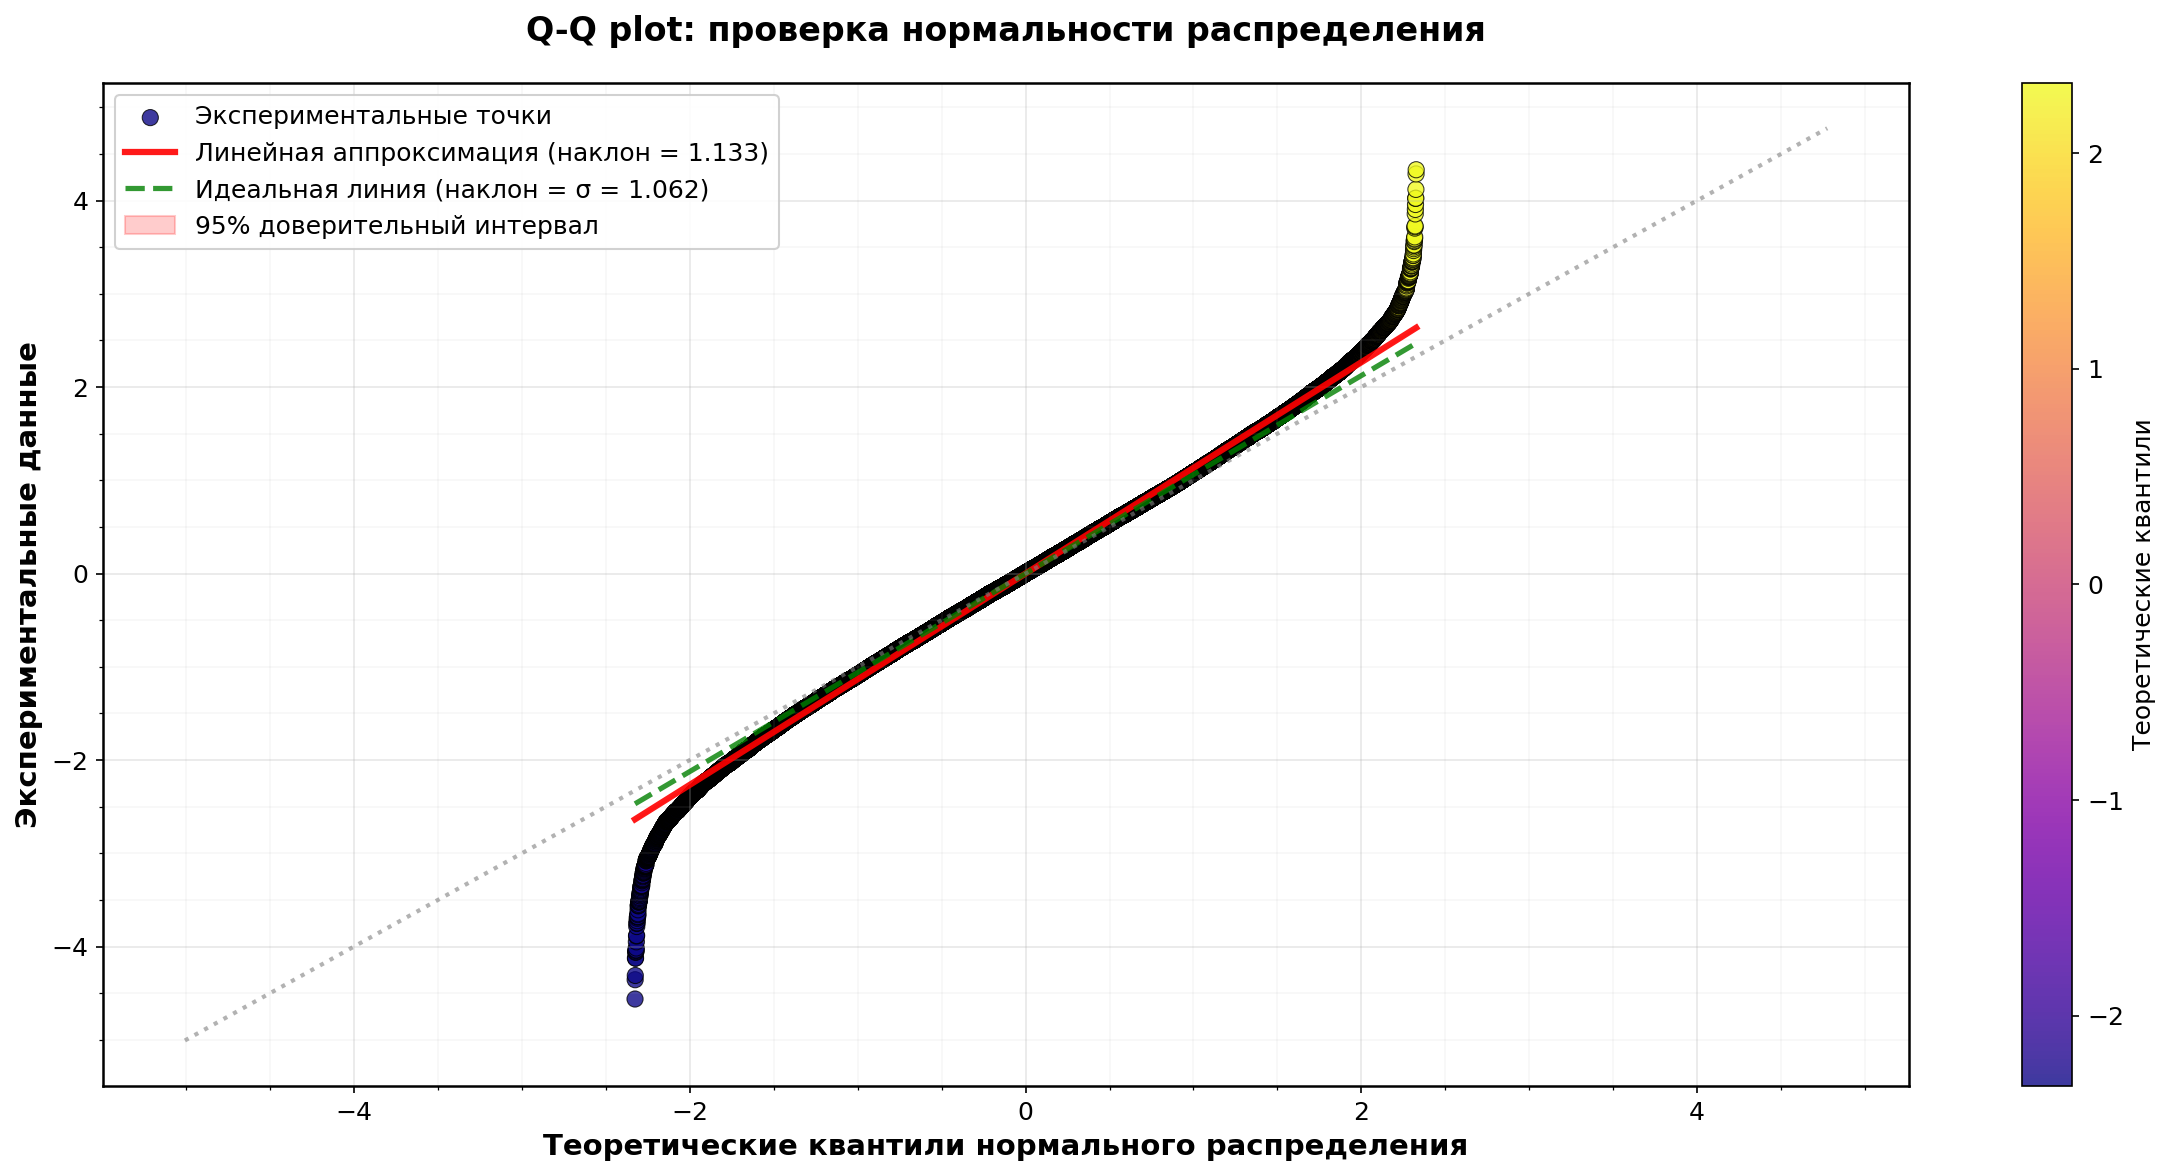

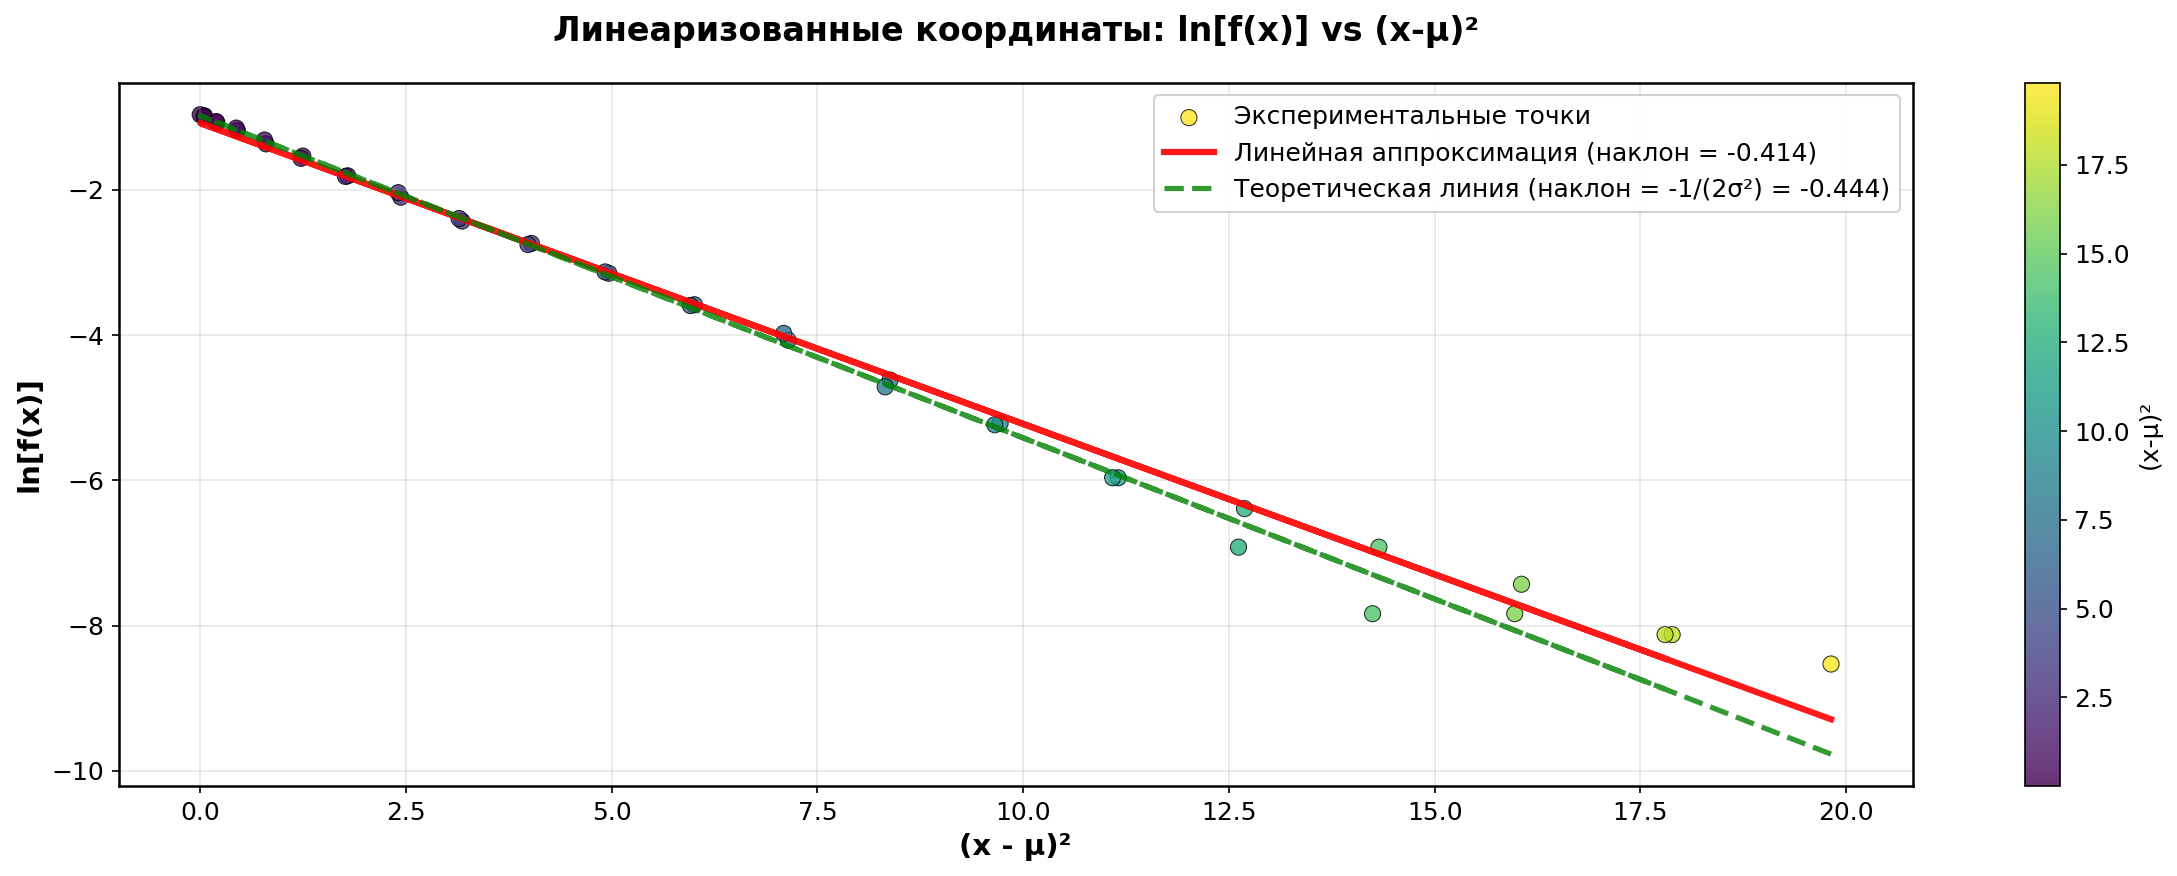


                         СТАТИСТИЧЕСКИЕ ТЕСТЫ НОРМАЛЬНОСТИ

Тест Д'Агостино:
  Статистика:                                10.3436
  p-value:                                   0.005674
  Гипотеза:                 ОТВЕРГАЕМ нормальность

Тест Колмогорова-Смирнова:
  Статистика:                                 0.0047
  p-value:                                   0.266276
  Гипотеза:                 ПРИНИМАЕМ нормальность

                              ИТОГОВАЯ ОЦЕНКА
Асимметрия: 0.0223 → оценка: 97.8%
Эксцесс: 0.0601 → оценка: 97.0%
Q-Q plot R²: 0.9951 → оценка: 99.5%
Статистические тесты: 1/3 пройдены → оценка: 100.0%
--------------------------------------------------------------------------------
ОБЩАЯ ОЦЕНКА НОРМАЛЬНОСТИ: 98.6%
               🎯 ОТЛИЧНОЕ СООТВЕТСТВИЕ НОРМАЛЬНОМУ РАСПРЕДЕЛЕНИЮ                


In [15]:

# НАСТРОЙКА ВЫСОКОГО КАЧЕСТВА ГРАФИКОВ
plt.rcParams['figure.figsize'] = [16, 6]
plt.rcParams['figure.dpi'] = 150
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 6
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3
plt.rcParams['font.family'] = 'DejaVu Sans'

def load_data(filename):
    """Загружает данные из файла"""
    return np.loadtxt(filename)

def normal_distribution(x, mu, sigma, A):
    """Функция нормального распределения"""
    return A * np.exp(-0.5 * ((x - mu) / sigma)**2) / (sigma * np.sqrt(2 * np.pi))

def analyze_normal_distribution(filename):
    # Загрузка данных
    data = load_data(filename)
    
    print("=" * 80)
    print(" " * 20 + "АНАЛИЗ НОРМАЛЬНОГО РАСПРЕДЕЛЕНИЯ")
    print("=" * 80)
    
    # ОСНОВНЫЕ СТАТИСТИКИ
    mu_exp = np.mean(data)
    sigma_exp = np.std(data)
    median_exp = np.median(data)
    
    print("ОСНОВНЫЕ СТАТИСТИКИ:")
    print(f"Количество данных: {len(data):>8}")
    print(f"Среднее значение (μ): {mu_exp:>15.4f}")
    print(f"Стандартное отклонение (σ): {sigma_exp:>8.4f}")
    print(f"Медиана: {median_exp:>28.4f}")
    print(f"Минимальное значение: {np.min(data):>15.4f}")
    print(f"Максимальное значение: {np.max(data):>13.4f}")
    
    # МОМЕНТЫ РАСПРЕДЕЛЕНИЯ
    skewness = stats.skew(data)
    kurtosis = stats.kurtosis(data)
    
    print(f"\nМОМЕНТЫ РАСПРЕДЕЛЕНИЯ:")
    print(f"Асимметрия (skewness): {skewness:>12.4f} (теор. для нормального: 0.000)")
    print(f"Эксцесс (kurtosis): {kurtosis:>17.4f} (теор. для нормального: 0.000)")
    
    # ВЫСОКОКАЧЕСТВЕННАЯ ГИСТОГРАММА
    fig1, ax1 = plt.subplots(1, 1, figsize=(16, 8), dpi=150)
    
    # Гистограмма с улучшенными настройками
    hist, bins, patches = ax1.hist(data, bins=40, density=True, alpha=0.8, 
                                  color='#1f77b4', label='Экспериментальные данные',
                                  edgecolor='white', linewidth=1.2,
                                  rwidth=0.85)
    
    bin_centers = (bins[:-1] + bins[1:]) / 2
    
    # Подгонка нормального распределения
    try:
        # Начальные приближения
        p0 = [mu_exp, sigma_exp, 1.0]
        popt, pcov = curve_fit(normal_distribution, bin_centers, hist, p0=p0)
        mu_fit, sigma_fit, A_fit = popt
        
        # Теоретическая кривая с высоким разрешением
        x_range = np.linspace(np.min(data), np.max(data), 500)
        theory = normal_distribution(x_range, mu_fit, sigma_fit, A_fit)
        ax1.plot(x_range, theory, 'r-', linewidth=3, label='Подгонка нормального распределения', alpha=0.9)
        
        # Идеальное нормальное распределение с параметрами из данных
        theory_perfect = stats.norm.pdf(x_range, mu_exp, sigma_exp)
        ax1.plot(x_range, theory_perfect, 'g--', linewidth=2.5, 
                label=f'Нормальное распределение N({mu_exp:.2f}, {sigma_exp:.2f}²)', alpha=0.8)
        
        print(f"\nПАРАМЕТРЫ ПОДГОНКИ:")
        print(f"μ (среднее): {mu_fit:>30.4f}")
        print(f"σ (стандартное отклонение): {sigma_fit:>12.4f}")
        print(f"A (амплитуда): {A_fit:>28.4f}")
        
    except Exception as e:
        print(f"Ошибка подгонки: {e}")
        mu_fit, sigma_fit, A_fit = mu_exp, sigma_exp, 1.0
    
    # ВЕРТИКАЛЬНЫЕ ЛИНИИ С УЛУЧШЕННЫМ ВИЗУАЛОМ
    y_max = np.max(hist) * 1.15
    
    # Характерные точки нормального распределения
    characteristics = [
        (mu_exp, 'red', '--', 3, f'Среднее (μ = {mu_exp:.3f})'),
        (mu_exp + sigma_exp, 'green', '--', 2, f'μ + σ = {mu_exp + sigma_exp:.3f}'),
        (mu_exp - sigma_exp, 'green', '--', 2, f'μ - σ = {mu_exp - sigma_exp:.3f}'),
        (mu_exp + 2*sigma_exp, 'orange', '--', 2, f'μ + 2σ = {mu_exp + 2*sigma_exp:.3f}'),
        (mu_exp - 2*sigma_exp, 'orange', '--', 2, f'μ - 2σ = {mu_exp - 2*sigma_exp:.3f}')
    ]
    
    for value, color, ls, lw, label in characteristics:
        ax1.axvline(x=value, color=color, linestyle=ls, linewidth=lw, alpha=0.8, label=label)
        
        # Подписи для основных линий
        if color == 'red':  # Среднее
            ax1.text(value, y_max * 0.95, f'μ = {value:.3f}', 
                    ha='center', va='bottom', color=color, fontweight='bold', fontsize=13,
                    bbox=dict(boxstyle="round,pad=0.4", facecolor='white', alpha=0.9, edgecolor=color))
        elif color == 'green':  # ±σ
            ax1.text(value, y_max * 0.85, f'μ ± σ', 
                    ha='center', va='bottom', color=color, fontweight='bold', fontsize=11,
                    bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8, edgecolor=color))
    
    # НАСТРОЙКА ВНЕШНЕГО ВИДА ГРАФИКА
    ax1.set_xlabel('Значение', fontsize=14, fontweight='bold')
    ax1.set_ylabel('Плотность вероятности', fontsize=14, fontweight='bold')
    ax1.set_title('Нормальное распределение: экспериментальные данные и теоретическая кривая', 
                 fontsize=16, fontweight='bold', pad=20)
    ax1.legend(fontsize=11, loc='upper right', framealpha=0.9)
    ax1.grid(True, alpha=0.2)
    ax1.set_ylim(0, y_max)
    
    # Улучшенная сетка
    ax1.grid(True, which='major', alpha=0.3)
    ax1.grid(True, which='minor', alpha=0.1)
    ax1.minorticks_on()
    
    # Темная рамка
    for spine in ax1.spines.values():
        spine.set_linewidth(1.2)
        spine.set_color('black')
    
    plt.tight_layout()
    plt.show()
    
    # ЛИНЕАРИЗОВАННЫЙ АНАЛИЗ ДЛЯ НОРМАЛЬНОГО РАСПРЕДЕЛЕНИЯ
    fig2, ax2 = plt.subplots(1, 1, figsize=(16, 8), dpi=150)
    
    # Линеаризация: probit-график (Q-Q plot в линеаризованных координатах)
    sorted_data = np.sort(data)
    n = len(sorted_data)
    theoretical_quantiles = stats.norm.ppf(np.linspace(0.01, 0.99, n))
    
    # Линеаризованный график: данные vs теоретические квантили
    scatter = ax2.scatter(theoretical_quantiles, sorted_data, alpha=0.8, s=60,
                         c=theoretical_quantiles, cmap='plasma', 
                         label='Экспериментальные точки',
                         edgecolors='black', linewidth=0.5)
    
    # Линейная регрессия
    if len(theoretical_quantiles) > 2:
        slope, intercept, r_value, p_value, std_err = stats.linregress(theoretical_quantiles, sorted_data)
        y_fit = intercept + slope * theoretical_quantiles
        
        # Основная линия регрессии
        ax2.plot(theoretical_quantiles, y_fit, 'red', linewidth=3, 
                label=f'Линейная аппроксимация (наклон = {slope:.3f})', alpha=0.9)
        
        # Идеальная линия y = μ + σx
        ideal_slope = sigma_exp
        ideal_intercept = mu_exp
        ideal_line = ideal_intercept + ideal_slope * theoretical_quantiles
        ax2.plot(theoretical_quantiles, ideal_line, 'green', linestyle='--', linewidth=2.5,
                label=f'Идеальная линия (наклон = σ = {ideal_slope:.3f})', alpha=0.8)
        
        # Доверительный интервал
        y_err = std_err * np.sqrt(1/len(theoretical_quantiles) + 
                                 (theoretical_quantiles - np.mean(theoretical_quantiles))**2 / 
                                 np.sum((theoretical_quantiles - np.mean(theoretical_quantiles))**2))
        ax2.fill_between(theoretical_quantiles, y_fit - 1.96*y_err, y_fit + 1.96*y_err, 
                        color='red', alpha=0.2, label='95% доверительный интервал')
    
    # НАСТРОЙКА ВНЕШНЕГО ВИДА ЛИНЕАРИЗОВАННОГО ГРАФИКА
    ax2.set_xlabel('Теоретические квантили нормального распределения', fontsize=14, fontweight='bold')
    ax2.set_ylabel('Экспериментальные данные', fontsize=14, fontweight='bold')
    ax2.set_title('Q-Q plot: проверка нормальности распределения', 
                 fontsize=16, fontweight='bold', pad=20)
    ax2.legend(fontsize=12, framealpha=0.9)
    
    # Линия y = x для идеального соответствия (в стандартизованных координатах)
    xlim = ax2.get_xlim()
    ylim = ax2.get_ylim()
    lims = [min(xlim[0], ylim[0]), max(xlim[1], ylim[1])]
    ax2.plot(lims, lims, 'gray', linestyle=':', linewidth=2, alpha=0.6, label='Линия идеального соответствия')
    
    ax2.grid(True, which='major', alpha=0.3)
    ax2.grid(True, which='minor', alpha=0.1)
    ax2.minorticks_on()
    
    for spine in ax2.spines.values():
        spine.set_linewidth(1.2)
        spine.set_color('black')
    
    # Цветовая шкала
    cbar = plt.colorbar(scatter, ax=ax2)
    cbar.set_label('Теоретические квантили', fontsize=12)
    
    plt.tight_layout()
    plt.show()
    
    # АЛЬТЕРНАТИВНЫЙ ЛИНЕАРИЗОВАННЫЙ АНАЛИЗ: логарифм плотности
    fig3, ax3 = plt.subplots(1, 1, figsize=(16, 6), dpi=150)
    
    # Линеаризация: ln(f(x)) vs (x-μ)²
    mask = (hist > 0)
    x_centers_masked = bin_centers[mask]
    hist_masked = hist[mask]
    
    # Вычисляем квадраты отклонений от среднего
    deviations_sq = (x_centers_masked - mu_exp)**2
    log_density = np.log(hist_masked)
    
    scatter2 = ax3.scatter(deviations_sq, log_density, alpha=0.8, s=60,
                          c=deviations_sq, cmap='viridis',
                          label='Экспериментальные точки',
                          edgecolors='black', linewidth=0.5)
    
    # Теоретическая зависимость: ln(f(x)) = const - (x-μ)²/(2σ²)
    if len(deviations_sq) > 2:
        # Линейная регрессия: ln(f(x)) = a + b*(x-μ)²
        slope_ln, intercept_ln, r_value_ln, p_value_ln, std_err_ln = stats.linregress(deviations_sq, log_density)
        y_fit_ln = intercept_ln + slope_ln * deviations_sq
        
        ax3.plot(deviations_sq, y_fit_ln, 'red', linewidth=3,
                label=f'Линейная аппроксимация (наклон = {slope_ln:.3f})', alpha=0.9)
        
        # Теоретический наклон: -1/(2σ²)
        theoretical_slope = -1 / (2 * sigma_exp**2)
        theoretical_intercept = np.log(1/(sigma_exp * np.sqrt(2*np.pi)))
        theoretical_line = theoretical_intercept + theoretical_slope * deviations_sq
        
        ax3.plot(deviations_sq, theoretical_line, 'green', linestyle='--', linewidth=2.5,
                label=f'Теоретическая линия (наклон = -1/(2σ²) = {theoretical_slope:.3f})', alpha=0.8)
    
    ax3.set_xlabel('(x - μ)²', fontsize=14, fontweight='bold')
    ax3.set_ylabel('ln[f(x)]', fontsize=14, fontweight='bold')
    ax3.set_title('Линеаризованные координаты: ln[f(x)] vs (x-μ)²', 
                 fontsize=16, fontweight='bold', pad=20)
    ax3.legend(fontsize=12, framealpha=0.9)
    ax3.grid(True, alpha=0.3)
    
    for spine in ax3.spines.values():
        spine.set_linewidth(1.2)
        spine.set_color('black')
    
    cbar2 = plt.colorbar(scatter2, ax=ax3)
    cbar2.set_label('(x-μ)²', fontsize=12)
    
    plt.tight_layout()
    plt.show()
    
    # СТАТИСТИЧЕСКИЕ ТЕСТЫ НОРМАЛЬНОСТИ
    print("\n" + "="*80)
    print(" " * 25 + "СТАТИСТИЧЕСКИЕ ТЕСТЫ НОРМАЛЬНОСТИ")
    print("="*80)
    
    # Тест Шапиро-Уилка (для n < 5000)
    if len(data) <= 5000:
        shapiro_stat, shapiro_p = stats.shapiro(data)
        print(f"Тест Шапиро-Уилка:")
        print(f"  Статистика: {shapiro_stat:>38.4f}")
        print(f"  p-value: {shapiro_p:>42.6f}")
        print(f"  Гипотеза: {'ПРИНИМАЕМ нормальность' if shapiro_p > 0.05 else 'ОТВЕРГАЕМ нормальность':>38}")
    
    # Тест нормальности (Д'Агостино)
    dagostino_stat, dagostino_p = stats.normaltest(data)
    print(f"\nТест Д'Агостино:")
    print(f"  Статистика: {dagostino_stat:>38.4f}")
    print(f"  p-value: {dagostino_p:>42.6f}")
    print(f"  Гипотеза: {'ПРИНИМАЕМ нормальность' if dagostino_p > 0.05 else 'ОТВЕРГАЕМ нормальность':>38}")
    
    # Тест Колмогорова-Смирнова
    ks_stat, ks_p = stats.kstest(data, 'norm', args=(mu_exp, sigma_exp))
    print(f"\nТест Колмогорова-Смирнова:")
    print(f"  Статистика: {ks_stat:>38.4f}")
    print(f"  p-value: {ks_p:>42.6f}")
    print(f"  Гипотеза: {'ПРИНИМАЕМ нормальность' if ks_p > 0.05 else 'ОТВЕРГАЕМ нормальность':>38}")
    
    # ИТОГОВАЯ ОЦЕНКА
    print("\n" + "="*80)
    print(" " * 30 + "ИТОГОВАЯ ОЦЕНКА")
    print("="*80)
    
    # Оценка по нескольким критериям
    scores = []
    
    # 1. Асимметрия
    skewness_score = min(100, 100 - abs(skewness) * 100)
    scores.append(skewness_score)
    print(f"Асимметрия: {abs(skewness):.4f} → оценка: {skewness_score:.1f}%")
    
    # 2. Эксцесс
    kurtosis_score = min(100, 100 - abs(kurtosis) * 50)
    scores.append(kurtosis_score)
    print(f"Эксцесс: {abs(kurtosis):.4f} → оценка: {kurtosis_score:.1f}%")
    
    # 3. Q-Q plot линейность
    if 'r_value' in locals():
        qq_score = r_value**2 * 100
        scores.append(qq_score)
        print(f"Q-Q plot R²: {r_value**2:.4f} → оценка: {qq_score:.1f}%")
    
    # 4. Тесты нормальности
    test_scores = []
    if len(data) <= 5000 and shapiro_p > 0.05:
        test_scores.append(100)
    if dagostino_p > 0.05:
        test_scores.append(100)
    if ks_p > 0.05:
        test_scores.append(100)
    
    if test_scores:
        test_score = np.mean(test_scores)
        scores.append(test_score)
        print(f"Статистические тесты: {len(test_scores)}/3 пройдены → оценка: {test_score:.1f}%")
    
    final_score = np.mean(scores)
    
    print("-" * 80)
    print(f"ОБЩАЯ ОЦЕНКА НОРМАЛЬНОСТИ: {final_score:.1f}%")
    
    if final_score >= 90:
        quality = "🎯 ОТЛИЧНОЕ СООТВЕТСТВИЕ НОРМАЛЬНОМУ РАСПРЕДЕЛЕНИЮ"
        color = '\033[92m'
    elif final_score >= 75:
        quality = "✅ ХОРОШЕЕ СООТВЕТСТВИЕ НОРМАЛЬНОМУ РАСПРЕДЕЛЕНИЮ"
        color = '\033[94m'
    elif final_score >= 60:
        quality = "⚠️  УДОВЛЕТВОРИТЕЛЬНОЕ СООТВЕТСТВИЕ"
        color = '\033[93m'
    else:
        quality = "❌ ПЛОХОЕ СООТВЕТСТВИЕ НОРМАЛЬНОМУ РАСПРЕДЕЛЕНИЮ"
        color = '\033[91m'
    
    print(f"{color}{quality:^80}\033[0m")
    
    return data

# Создание тестовых данных нормального распределения
def create_normal_test_data():
    """Создает тестовые данные нормального распределения"""
    data = np.random.normal(loc=0.0, scale=1.0, size=5000)
    np.savetxt('data.txt', data)
    print("\nСоздан файл data.txt с тестовыми данными нормального распределения")
    return data

# Запуск анализа
if __name__ == "__main__":
    try:
        data = analyze_normal_distribution('C:\\NormanProject\\Molecular_Dynamics_project\\velocity_coord.txt')
    except:
        print("Файл не найден. Создаю тестовые данные...")
        create_normal_test_data()
        data = analyze_normal_distribution('data.txt')

зсэ

АНАЛИЗАТОР СОХРАНЕНИЯ ЭНЕРГИИ


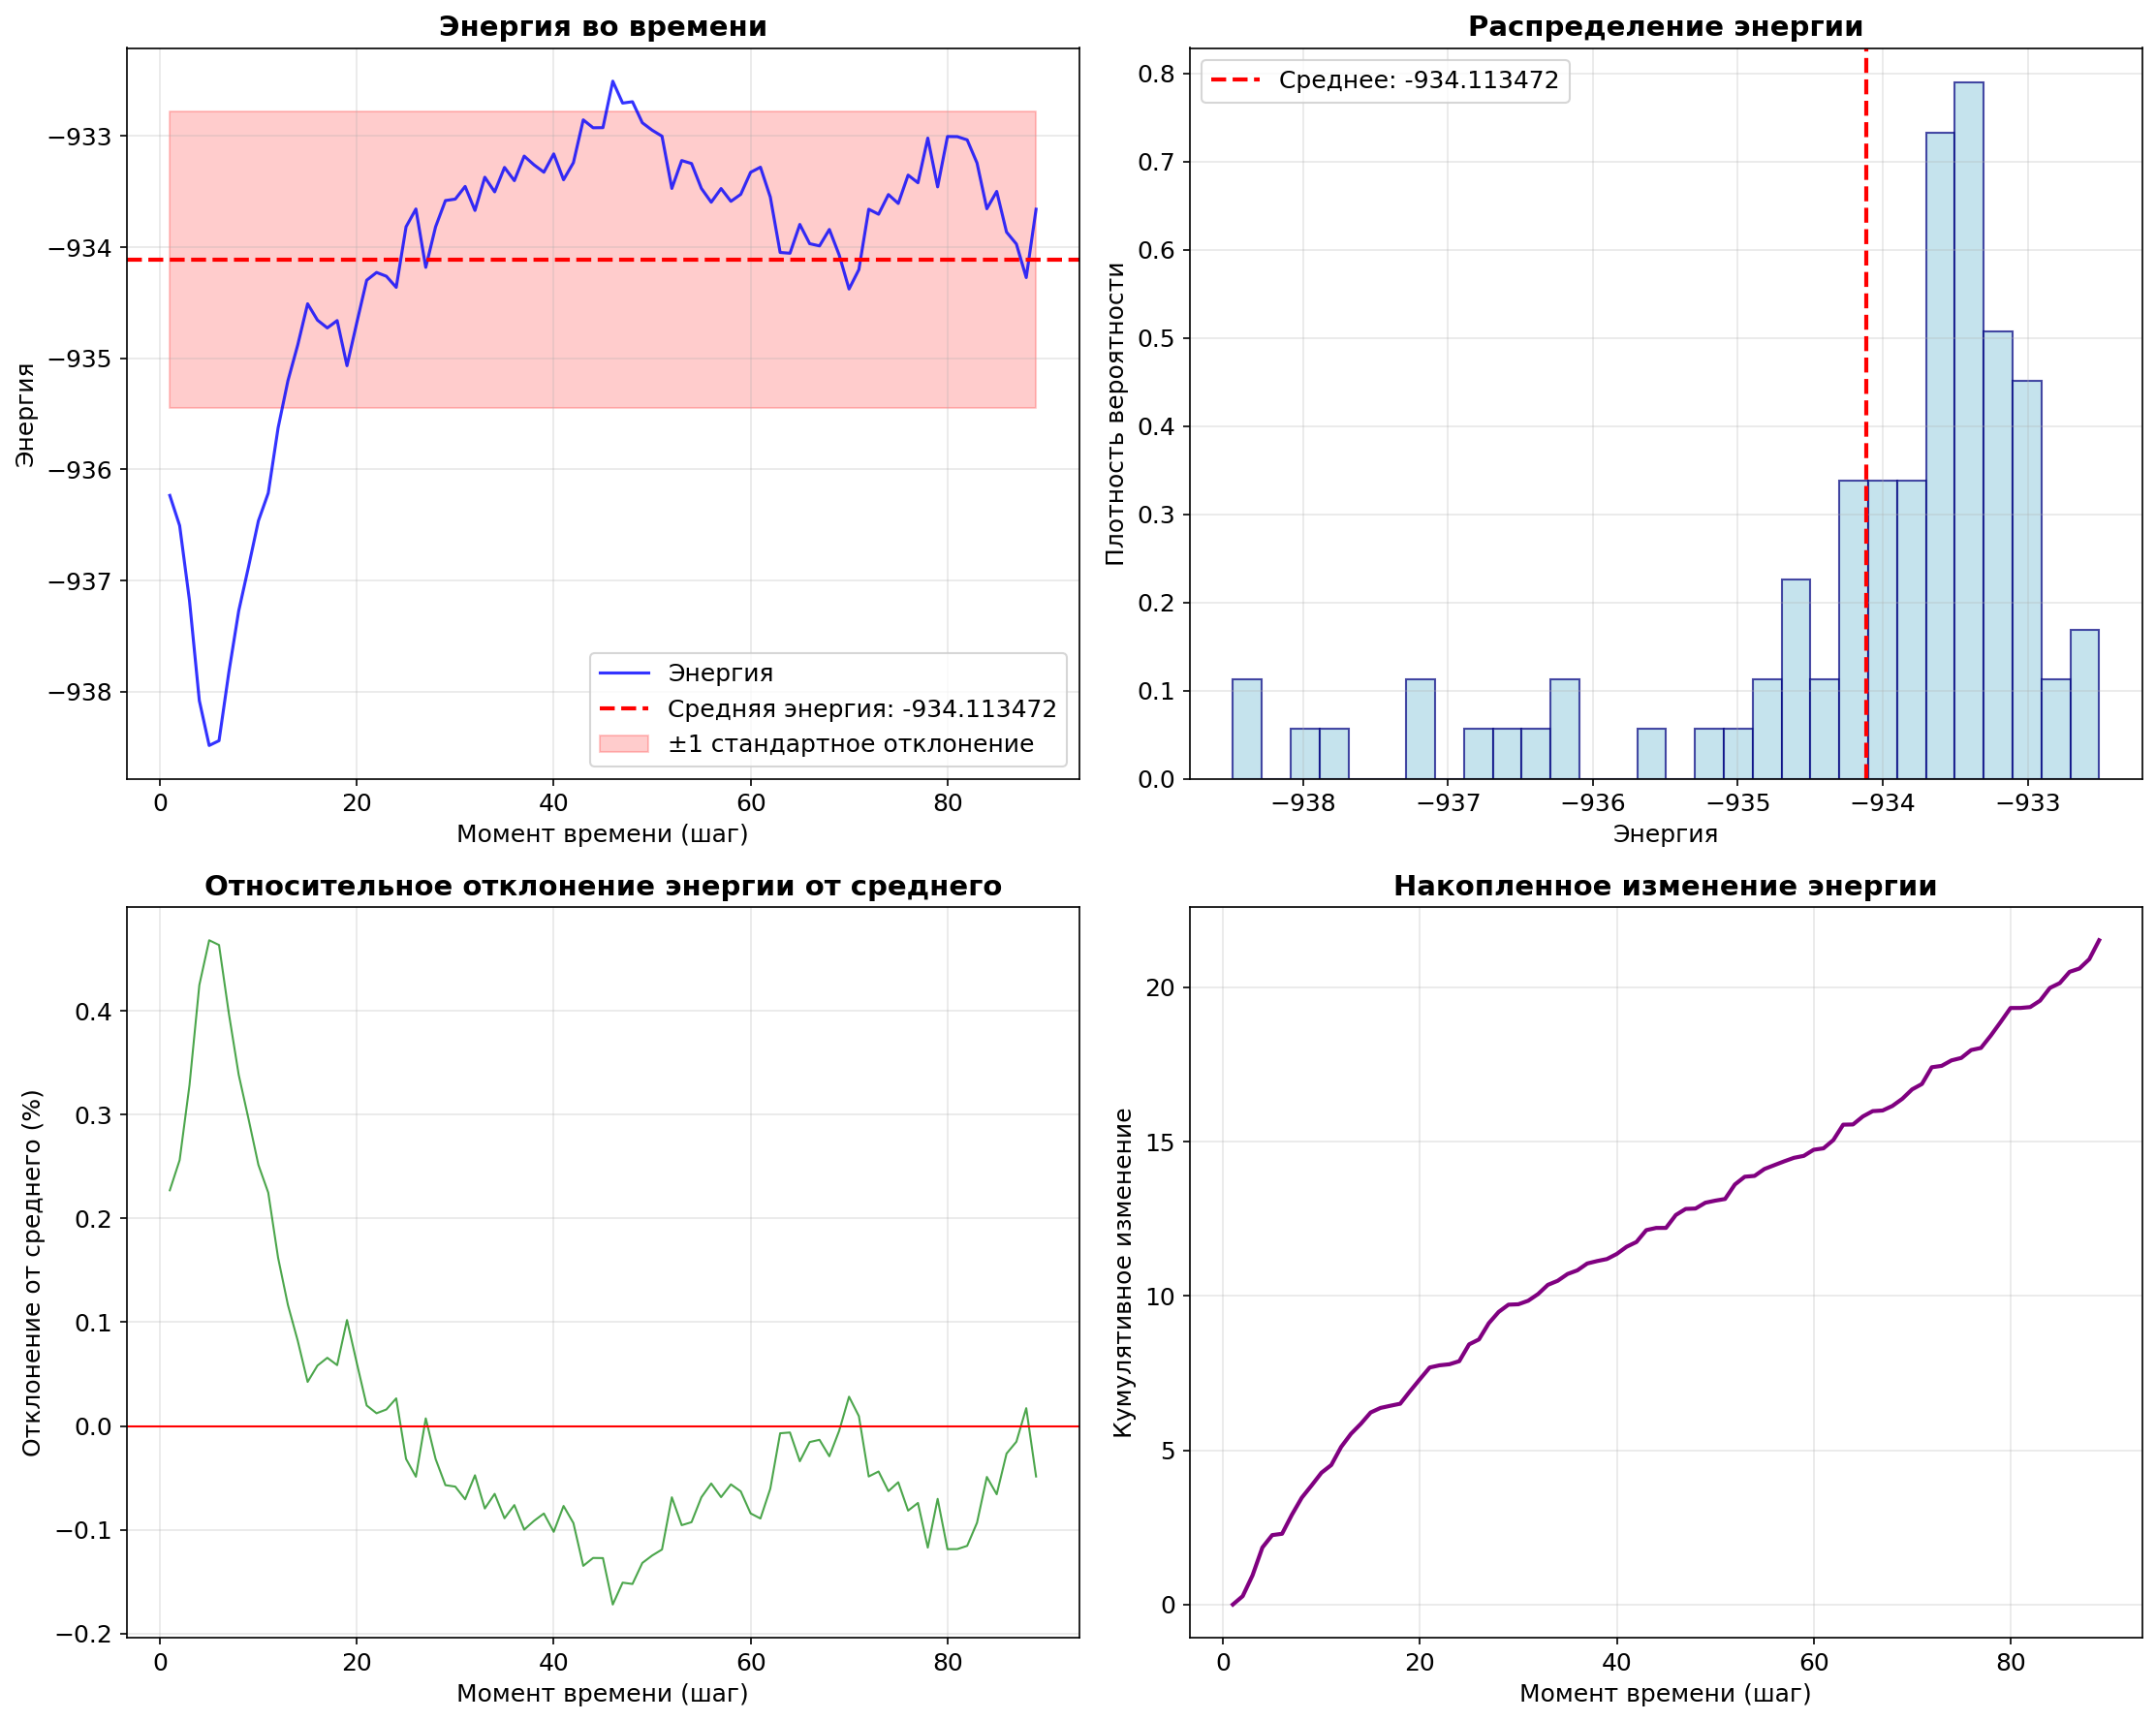


АНАЛИЗ СОХРАНЕНИЯ ЭНЕРГИИ: C:\NormanProject\Molecular_Dynamics_project\energy.txt
Общее количество измерений: 89
Временной диапазон: 89 шагов
Средняя энергия: -934.1134719101
Стандартное отклонение: 1.3358493161
Минимальная энергия: -938.4840000000
Максимальная энергия: -932.5070000000
Размах энергии: 5.9770000000
Относительная флуктуация (σ/μ): -0.00143007 (-0.143007%)
Максимальное относительное отклонение: 0.467880%

КРИТЕРИИ СОХРАНЕНИЯ ЭНЕРГИИ:
1. Относительная флуктуация: ОТЛИЧНОЕ сохранение
   (флуктуация = -0.1430%)
2. Стабильность энергии: УМЕРЕННО СТАБИЛЬНАЯ
   (σ/размах = 0.2235)
3. Общий дрейф энергии: 2.57500000 (-0.2757%)
   Дрейф: НЕЗНАЧИТЕЛЬНЫЙ

АНАЛИЗ СТАЦИОНАРНОСТИ:
Среднее изменение за шаг: 0.0292613636
Стандартное отклонение изменений: 0.3057243818
✓ Энергия демонстрирует свойства стационарного процесса

АНАЛИЗ АВТОКОРРЕЛЯЦИИ:
Автокорреляция с лагом 1: 0.959062
⚠ Заметная корреляция между последовательными значениями
Экспортировать результаты анализа? (y/n): y
Резуль

In [16]:
def analyze_energy_conservation(filename):
    """
    Анализирует сохранение энергии во времени
    """
    # Проверка существования файла
    if not os.path.exists(filename):
        print(f"Ошибка: Файл '{filename}' не найден.")
        return
    
    # Чтение данных энергии
    energy = []
    time_points = []
    with open(filename, 'r', encoding='utf-8') as file:
        for line_num, line in enumerate(file, 1):
            line = line.strip()
            if line:
                try:
                    energy_value = float(line)
                    energy.append(energy_value)
                    time_points.append(line_num)  # Номер строки как момент времени
                except ValueError:
                    print(f"Предупреждение: Строка {line_num} содержит некорректные данные: '{line}'")
    
    if not energy:
        print("Ошибка: Не найдено корректных числовых данных.")
        return
    
    energy = np.array(energy)
    time_points = np.array(time_points)
    
    # Основная статистика энергии
    mean_energy = np.mean(energy)
    std_energy = np.std(energy)
    min_energy = np.min(energy)
    max_energy = np.max(energy)
    energy_range = max_energy - min_energy
    
    # Анализ сохранения энергии
    energy_change = np.abs(energy - mean_energy)
    relative_fluctuation = std_energy / mean_energy if mean_energy != 0 else 0
    
    # Создание комплексного графика
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
    
    # 1. График энергии во времени
    ax1.plot(time_points, energy, 'b-', linewidth=1.5, alpha=0.8, label='Энергия')
    ax1.axhline(mean_energy, color='red', linestyle='--', linewidth=2, 
               label=f'Средняя энергия: {mean_energy:.6f}')
    ax1.fill_between(time_points, mean_energy - std_energy, mean_energy + std_energy, 
                    alpha=0.2, color='red', label='±1 стандартное отклонение')
    ax1.set_xlabel('Момент времени (шаг)')
    ax1.set_ylabel('Энергия')
    ax1.set_title('Энергия во времени', fontsize=14, fontweight='bold')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # 2. Гистограмма распределения энергии
    n, bins, patches = ax2.hist(energy, bins=30, density=True, alpha=0.7, 
                               color='lightblue', edgecolor='navy')
    ax2.axvline(mean_energy, color='red', linestyle='--', linewidth=2,
               label=f'Среднее: {mean_energy:.6f}')
    ax2.set_xlabel('Энергия')
    ax2.set_ylabel('Плотность вероятности')
    ax2.set_title('Распределение энергии', fontsize=14, fontweight='bold')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # 3. Отклонение от средней энергии
    deviation = energy - mean_energy
    relative_deviation = (deviation / mean_energy * 100) if mean_energy != 0 else deviation
    
    ax3.plot(time_points, relative_deviation, 'g-', linewidth=1, alpha=0.7)
    ax3.axhline(0, color='red', linestyle='-', linewidth=1)
    ax3.set_xlabel('Момент времени (шаг)')
    ax3.set_ylabel('Отклонение от среднего (%)' if mean_energy != 0 else 'Отклонение от среднего')
    ax3.set_title('Относительное отклонение энергии от среднего', fontsize=14, fontweight='bold')
    ax3.grid(True, alpha=0.3)
    
    # 4. Кумулятивное изменение энергии
    cumulative_change = np.cumsum(np.abs(np.diff(energy, prepend=energy[0])))
    ax4.plot(time_points, cumulative_change, 'purple', linewidth=2)
    ax4.set_xlabel('Момент времени (шаг)')
    ax4.set_ylabel('Кумулятивное изменение')
    ax4.set_title('Накопленное изменение энергии', fontsize=14, fontweight='bold')
    ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Детальный статистический анализ
    print("\n" + "="*80)
    print(f"АНАЛИЗ СОХРАНЕНИЯ ЭНЕРГИИ: {filename}")
    print("="*80)
    print(f"Общее количество измерений: {len(energy):,}")
    print(f"Временной диапазон: {len(energy)} шагов")
    print(f"Средняя энергия: {mean_energy:.10f}")
    print(f"Стандартное отклонение: {std_energy:.10f}")
    print(f"Минимальная энергия: {min_energy:.10f}")
    print(f"Максимальная энергия: {max_energy:.10f}")
    print(f"Размах энергии: {energy_range:.10f}")
    
    if mean_energy != 0:
        print(f"Относительная флуктуация (σ/μ): {relative_fluctuation:.8f} ({relative_fluctuation*100:.6f}%)")
        print(f"Максимальное относительное отклонение: {np.max(np.abs(relative_deviation)):.6f}%")
    
    # Критерии сохранения энергии
    print(f"\nКРИТЕРИИ СОХРАНЕНИЯ ЭНЕРГИИ:")
    
    # Критерий 1: Относительная флуктуация
    if mean_energy != 0:
        if relative_fluctuation < 0.01:  # 1%
            conservation_level = "ОТЛИЧНОЕ"
        elif relative_fluctuation < 0.05:  # 5%
            conservation_level = "ХОРОШЕЕ"
        elif relative_fluctuation < 0.1:  # 10%
            conservation_level = "УДОВЛЕТВОРИТЕЛЬНОЕ"
        else:
            conservation_level = "ПЛОХОЕ"
        
        print(f"1. Относительная флуктуация: {conservation_level} сохранение")
        print(f"   (флуктуация = {relative_fluctuation*100:.4f}%)")
    
    # Критерий 2: Стандартное отклонение
    if energy_range > 0:
        std_ratio = std_energy / energy_range
        if std_ratio < 0.1:
            std_level = "ОЧЕНЬ СТАБИЛЬНАЯ"
        elif std_ratio < 0.2:
            std_level = "СТАБИЛЬНАЯ"
        elif std_ratio < 0.3:
            std_level = "УМЕРЕННО СТАБИЛЬНАЯ"
        else:
            std_level = "НЕСТАБИЛЬНАЯ"
        
        print(f"2. Стабильность энергии: {std_level}")
        print(f"   (σ/размах = {std_ratio:.4f})")
    
    # Критерий 3: Дрейф энергии
    energy_drift = energy[-1] - energy[0]
    if mean_energy != 0:
        relative_drift = (energy_drift / mean_energy) * 100
        print(f"3. Общий дрейф энергии: {energy_drift:.8f} ({relative_drift:.4f}%)")
        
        if abs(relative_drift) < 1:
            drift_level = "НЕЗНАЧИТЕЛЬНЫЙ"
        elif abs(relative_drift) < 5:
            drift_level = "МАЛЫЙ"
        elif abs(relative_drift) < 10:
            drift_level = "ЗАМЕТНЫЙ"
        else:
            drift_level = "ЗНАЧИТЕЛЬНЫЙ"
        
        print(f"   Дрейф: {drift_level}")
    
    # Тест на стационарность (тест Дики-Фуллера упрощенный)
    energy_diff = np.diff(energy)
    mean_diff = np.mean(energy_diff)
    std_diff = np.std(energy_diff)
    
    print(f"\nАНАЛИЗ СТАЦИОНАРНОСТИ:")
    print(f"Среднее изменение за шаг: {mean_diff:.10f}")
    print(f"Стандартное отклонение изменений: {std_diff:.10f}")
    
    if abs(mean_diff) < std_diff * 0.1:
        print("✓ Энергия демонстрирует свойства стационарного процесса")
    else:
        print("⚠ Энергия имеет заметный систематический дрейф")
    
    # Автокорреляция для проверки зависимости
    if len(energy) > 10:
        autocorr = np.correlate(energy - mean_energy, energy - mean_energy, mode='full')
        autocorr = autocorr[len(autocorr)//2:] / autocorr[len(autocorr)//2]
        lag1_autocorr = autocorr[1] if len(autocorr) > 1 else 0
        
        print(f"\nАНАЛИЗ АВТОКОРРЕЛЯЦИИ:")
        print(f"Автокорреляция с лагом 1: {lag1_autocorr:.6f}")
        
        if abs(lag1_autocorr) < 0.1:
            print("✓ Последовательные значения энергии практически независимы")
        elif abs(lag1_autocorr) < 0.3:
            print("~ Слабая корреляция между последовательными значениями")
        else:
            print("⚠ Заметная корреляция между последовательными значениями")

# Функция для экспорта результатов
def export_energy_analysis(filename, output_filename=None):
    """Экспортирует анализ энергии в файл"""
    if output_filename is None:
        output_filename = f"energy_analysis_{os.path.basename(filename)}.txt"
    
    # Чтение данных (аналогично предыдущей функции)
    energy = []
    with open(filename, 'r', encoding='utf-8') as file:
        for line in file:
            line = line.strip()
            if line:
                try:
                    energy.append(float(line))
                except ValueError:
                    continue
    
    if not energy:
        return
    
    energy = np.array(energy)
    mean_energy = np.mean(energy)
    
    # Запись результатов в файл
    with open(output_filename, 'w', encoding='utf-8') as f:
        f.write(f"АНАЛИЗ СОХРАНЕНИЯ ЭНЕРГИИ\n")
        f.write(f"Файл: {filename}\n")
        f.write(f"Дата анализа: {np.datetime64('now')}\n")
        f.write("="*50 + "\n")
        f.write(f"Количество измерений: {len(energy)}\n")
        f.write(f"Средняя энергия: {mean_energy:.12f}\n")
        f.write(f"Стандартное отклонение: {np.std(energy):.12f}\n")
        f.write(f"Относительная флуктуация: {(np.std(energy)/mean_energy*100 if mean_energy != 0 else 0):.8f}%\n")
        f.write(f"Общий дрейф: {(energy[-1] - energy[0]):.12f}\n")
    
    print(f"Результаты экспортированы в: {output_filename}")

# Основная программа
if __name__ == "__main__":
    print("АНАЛИЗАТОР СОХРАНЕНИЯ ЭНЕРГИИ")
    print("=" * 40)
    
    filename = "C:\\NormanProject\\Molecular_Dynamics_project\\energy.txt"
    
    if os.path.exists(filename):
        analyze_energy_conservation(filename)
        
        # Экспорт результатов
        export_choice = input("Экспортировать результаты анализа? (y/n): ").lower()
        if export_choice == 'y':
            export_energy_analysis(filename)
    else:
        print(f"Файл '{filename}' не найден.")